In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.constants import pi
from PortCom import *
from astar import *
%matplotlib inline

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(rint "Connected to %s with Good motor card answer" % ser.port)? (PortCom.py, line 26)

## Paramètre de la Map

In [ ]:
print 3000/5
print 2000/5

In [ ]:
x_max=3000.0
y_max=2000.0
nb_x=60
nb_y=40

DistanceObstacleMin=200.0
DistanceObstacleMax=500.0

In [ ]:
3000/60

## Création de la Map

In [4]:
Map=Pathfinder(x_max, y_max, nb_x, nb_y, DistanceObstacleMin, DistanceObstacleMax)

In [5]:
%%timeit
Map=Pathfinder(x_max, y_max, nb_x, nb_y, DistanceObstacleMin, DistanceObstacleMax)
#Etude du temps de creation de la map

100 loops, best of 3: 7.34 ms per loop


In [10]:
%%timeit
Map.dellObstacle()

1000 loops, best of 3: 1.08 ms per loop


In [11]:
%%timeit
Map.addObstacle(1500.0,1000.0)

1000 loops, best of 3: 634 µs per loop


## Rajoute d'obstable sur la Map

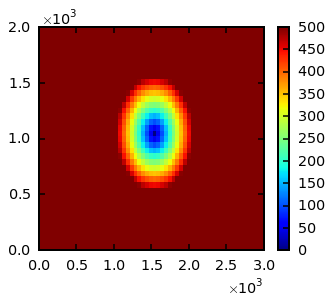

In [9]:
Map.dellObstacle()
#Map.addObstacle(700.0,1000.0)
Map.addObstacle(1500.0,1000.0)
#Map.addObstacle(1700.0,1000.0)
#Map.addObstacle(2000.0,1000.0)
#Map.addObstacle(2300.0,1000.0)
#Map.addObstacle(2600.0,1000.0)
#Map.addObstacle(1600.0,1000.0)
#Map.addObstacle(1400.0,1000.0)
Obs=Map.getTable()
plt.pcolor(Map.X,Map.Y,Obs.T)
plt.colorbar()
Obs[np.where(Obs<DistanceObstacleMin)]=0

## PathFinding

### Départ - Arrivé

In [10]:
x_start = 0.0#readFloat(ser,"XrR?")
y_start = 0.0#readFloat(ser,"YrR?")
ang_start=0
x_fin = 1500.0
y_fin = 2000.0-y_max/nb_y
VtsMax=50.0
VtsAng=1.0

### Calcul du plus court Chemin

In [11]:
Map.clean()
NodeFin = Map.pathfinding(x_start,y_start,ang_start,x_fin,y_fin,VtsMax,VtsAng)
TableX=[]
TableY=[]
TableAng=[]
TableTpsTrajet=[]
TableObs=[]
NodeFin.getParcours(TableX,TableY,TableAng,TableTpsTrajet,TableObs)

In [12]:
%%timeit
Map.clean()
NodeFin = Map.pathfinding(x_start,y_start,ang_start,x_fin,y_fin,VtsMax,VtsAng)
#Etude du temps de pathfinding

1 loops, best of 3: 200 ms per loop


In [13]:
#TableX

### Tracé

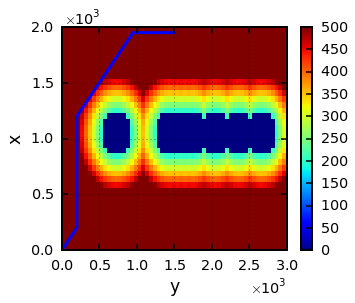

In [16]:
plt.pcolor(Map.X,Map.Y,Obs.T)
plt.colorbar()
x_p=np.array(TableX)
y_p=np.array(TableY)
plt.plot(x_p, y_p)
plt.ylabel('x')
plt.xlabel('y')
plt.grid(True)
plt.ylim((0,2000.0))
plt.xlim((0,3000.0))
plt.show()

### Envoie du parcours

In [13]:
Vmax=500
wait=0

In [19]:
DeltaAng=np.convolve(TableAng,[1,-1],mode="same")
PointAnguleux=np.where((DeltaAng>=pi/4.0)|(DeltaAng<=-pi/4.0))
PointAnguleux=PointAnguleux[0]
j=0
NbPt=len(PointAnguleux)*2
for i in PointAnguleux:
    String="PstCons %s 0 %.4s %s %s %s 4 %s 0.1 10.0 10.0 \n" % (NbPt, TableAng[i], TableX[i], TableY[i],Vmax, wait)
    ser.write(String)
    print String[:-1]
    j=j+1
    String="PstCons %s 0 %.4s %s %s %s 3 %s 0.05 100.0 100.0 \n" % (NbPt, TableAng[i], TableX[i], TableY[i],Vmax, wait)
    ser.write(String)
    print String[:-1]
    j=j+1
#ser.write("Restart \n")
#ser.close()

PstCons 10 0 0.78 50.0 50.0 500 4 0 0.1 10.0 10.0 
PstCons 10 0 0.78 50.0 50.0 500 3 0 0.05 100.0 100.0 
PstCons 10 0 1.57 200.0 250.0 500 4 0 0.1 10.0 10.0 
PstCons 10 0 1.57 200.0 250.0 500 3 0 0.05 100.0 100.0 
PstCons 10 0 0.78 250.0 1250.0 500 4 0 0.1 10.0 10.0 
PstCons 10 0 0.78 250.0 1250.0 500 3 0 0.05 100.0 100.0 
PstCons 10 0 0.0 900.0 1850.0 500 4 0 0.1 10.0 10.0 
PstCons 10 0 0.0 900.0 1850.0 500 3 0 0.05 100.0 100.0 
PstCons 10 0 0.78 1450.0 1900.0 500 4 0 0.1 10.0 10.0 
PstCons 10 0 0.78 1450.0 1900.0 500 3 0 0.05 100.0 100.0 


In [15]:
DeltaAng=np.convolve(TableAng,[1,-1],mode="same")
PointAnguleux=np.where((DeltaAng>=pi/4.0)|(DeltaAng<=-pi/4.0))
PointAnguleux=PointAnguleux[0]
j=0

for i in PointAnguleux:
    String="TuRn %.4s %s %s %s \n" % (j, TableAng[i],Vmax,wait)
    ser.write(String)
    #print String[:-1]
    j=j+1
    String="GoTo %s %s %s %s %s \n" % (j, TableX[i], TableY[i],Vmax,wait)
    ser.write(String)
    #print String[:-1]
    j=j+1
String="TuRn %.4s %s %s %s \n" % (j, TableAng[i],Vmax,wait)
ser.write(String)
#print String[:-1]
#ser.write("Restart \n")
#ser.close()

30L

In [31]:
DeltaAng=np.convolve(TableAng,[1,-1],mode="same")
PointAnguleux=np.where((DeltaAng>=pi/4.0)|(DeltaAng<=-pi/4.0))
j=0
for i in PointAnguleux[0]:
    String="GoTo %s %s %s %s %s \n" % (j, TableX[i], TableY[i],Vmax,wait)
    ser.write(String)
    print String[:-1]
    j=j+1
    String="TuRn %s %s %s %s \n" % (j, TableAng[i],Vmax,wait)
    ser.write(String)
    print String[:-1]
    j=j+1
#ser.write("Restart \n")
#ser.close()

GoTo 0 50.0 50.0 500 0 
TuRn 1 0.785398163397 500 0 
GoTo 2 150.0 200.0 500 0 
TuRn 3 1.57079632679 500 0 
GoTo 4 200.0 1200.0 500 0 
TuRn 5 0.785398163397 500 0 
GoTo 6 950.0 1900.0 500 0 
TuRn 7 0.0 500 0 
GoTo 8 1500.0 1950.0 500 0 
TuRn 9 0.785398163397 500 0 


### Lancement du parcours et vérification du déplacement

6L

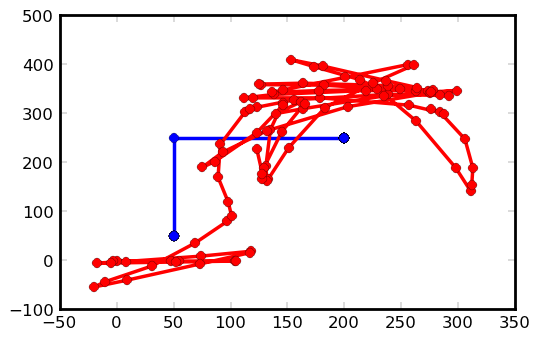

In [20]:
ser.write("Restart \n")
x_c,y_c,x_r,y_r=plotXY(ser,10.0, dt=0.1)
plt.plot(x_c,y_c,'-ob')
plt.plot(x_r,y_r,'-or')
ser.write("Stop \n")

0.0
0.0


In [8]:
print readFloat(ser,"XrR?")
print readFloat(ser,"YrR?")

0.0
0.0


In [10]:
Vmax=100
wait=1
String="PstCons %s 0 %.4s %s %s %s 3 %s\n" % (3, 0, 1000.0, 0.0,Vmax, wait)
ser.write(String)
String="PstCons %s 0 %.4s %s %s %s 4 %s\n" % (3, 0.7, 1000.0, 0.0,Vmax, wait)
ser.write(String)
String="PstCons %s 0 %.4s %s %s %s 3 %s\n" % (3, 0, 1000.0, 1000.0,Vmax, wait)
ser.write(String)

36L

6L

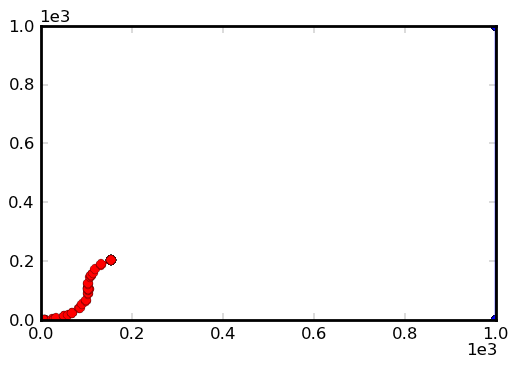

In [11]:
ser.write("Restart \n")
x_c,y_c,x_r,y_r=plotXY(ser,10.0, dt=0.1)
plt.plot(x_c,y_c,'-ob')
plt.plot(x_r,y_r,'-or')
ser.write("Stop \n")

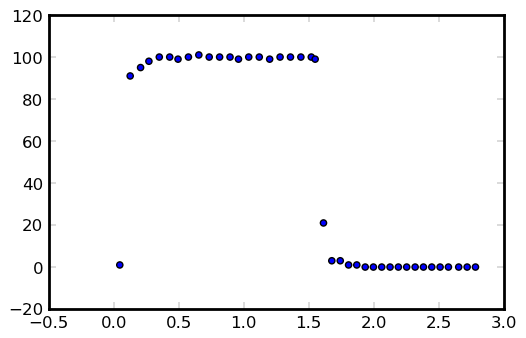

In [7]:
ser.write('VtsM 100 -100 \n')
tps0,y_p0=plotInfoTime(ser, "V1R?", 1,tps=list(), y_p=list())
ser.write("VtsM 0 0 \n")
tps0,y_p0=plotInfoTime(ser, "V1R?", 1,tps=tps0,y_p=y_p0)
plt.scatter(tps0,y_p0)

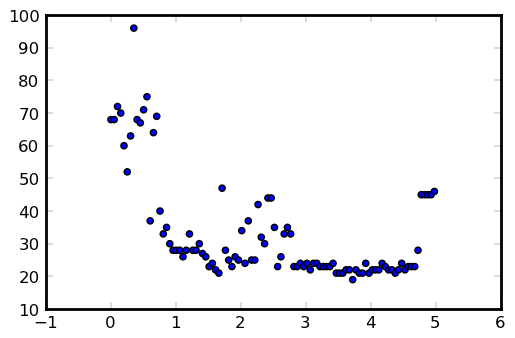

In [15]:
tps0,dOR0=plotInfoTime(ser, "dOR?", 5,tps=list(), y_p=list())
plt.scatter(tps0,dOR0)

In [19]:
import Queue
import threading 

In [ ]:
stack = Queue.LifoQueue(32)
ser.open()

In [20]:
try :
    Thread.__init__(self)
except BaseException as err :
    print("Erreur lors de la creation du thread :\n!!! %s !!!"%err)
#===============================================================
isActif = True
actualByte = 0
while self.isActif :
    actualByte = ser.read()
    try :
        if actualByte != "" :
            stack.put(actualByte,True,5)
            stack.task_done()
            time.sleep(0.001)
    except :
        print("Stack pleine")
        pass

for i in range(15) :
    try :
        print("Data =>%s<="%stack.get(True,10))
    except :
        print("no data")
        pass
thrd.kill()
stack.join()

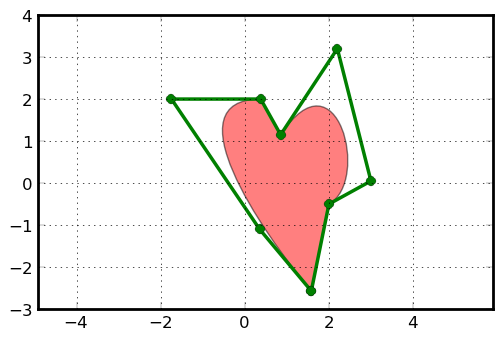

In [12]:
"""
Demo of a PathPatch object.
"""
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()


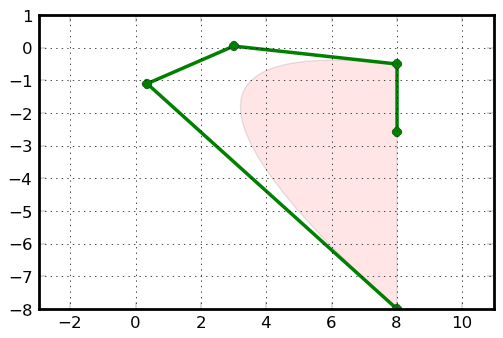

In [20]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (8, -8)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (8.0, -0.5)),
    (Path.CLOSEPOLY, (8, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.1)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()
